# Panel Models for Predicting Barley Harvest Days

In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from linearmodels.panel import PanelOLS

In [2]:
#Reading in the barley data
cwd =os.getcwd()
p_cwd = Path(cwd).parent.absolute()
df = pd.read_csv(os.path.join(p_cwd, "data","barley_data","winterbarley.csv"))

In [3]:
df.sort_values('year')

,s_id,lon,lat,alt,phase_id,year,day_year
0,618,10.73330,52.7333,85,2,1951,65
1381,1528,9.00000,51.7333,260,0,1951,265
1380,1418,7.30000,51.8333,65,0,1951,265
1379,726,10.58330,53.0667,25,1,1951,265
1378,534,10.23330,52.2333,85,0,1951,265
...,...,...,...,...,...,...,...
148808,2038,8.70000,50.7333,180,4,2019,154
148809,2766,9.85000,49.5333,330,4,2019,154
148810,2841,8.65000,49.1000,140,5,2019,154
148799,6039,9.23225,50.1800,230,4,2019,152


In [4]:
df['year_dummy']=df['year']

In [5]:
df.dtypes

s_id            int64
lon           float64
lat           float64
alt             int64
phase_id        int64
year            int64
day_year        int64
year_dummy      int64
dtype: object

In [6]:
#selecting the observations in year 2019 as a test dataset
df_test = df[df['year']==2019]

In [7]:
df_test

,s_id,lon,lat,alt,phase_id,year,day_year,year_dummy
147615,1184,6.16667,51.7000,30,2,2019,63,2019
147616,1266,6.81667,50.9167,80,2,2019,69,2019
147617,270,10.26670,53.7333,45,2,2019,70,2019
147618,1287,7.13333,51.0000,90,2,2019,70,2019
147619,2718,9.10000,49.2167,200,2,2019,73,2019
...,...,...,...,...,...,...,...,...
151177,5866,6.66667,51.7667,40,1,2019,311,2019
151178,3034,7.60000,47.8667,220,1,2019,312,2019
151179,2855,9.31667,49.5333,340,1,2019,313,2019
151180,2895,8.53333,49.4000,100,1,2019,316,2019


In [8]:
# train dataset
df_train = df[df['year'] != 2019]

In [9]:
df_train

,s_id,lon,lat,alt,phase_id,year,day_year,year_dummy
0,618,10.73330,52.7333,85,2,1951,65,1951
1,2865,8.73333,49.3000,170,2,1951,71,1951
2,1810,8.93333,49.9667,130,2,1951,79,1951
3,3414,11.36670,47.9000,670,2,1951,79,1951
4,1416,7.30000,51.9667,110,2,1951,82,1951
...,...,...,...,...,...,...,...,...
400726,2692,9.30000,48.7333,240,0,1963,241,1963
400727,2601,8.21667,49.1500,130,0,1963,242,1963
400728,3950,10.95000,49.3667,380,0,1963,242,1963
400729,1150,7.06667,51.2333,220,5,1963,244,1963


## Panel Model for Harvest Data

In [11]:
# Creating a multi-index df and then selecting the harvest observations
df_mi = df_train.set_index(['s_id', 'year'])
df_train_harvest = df_mi[df_mi['phase_id']==5]
df_train_harvest.drop(['phase_id'], axis=1, inplace=True)

/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
df_train_harvest

lon      lat  alt  day_year  year_dummy
s_id year                                              
1802 1952   8.56667  49.8000   90       183        1952
     1953   8.56667  49.8000   90       188        1953
2751 1988   9.13333  49.0000  200       162        1988
2293 1988   7.18333  50.6000  110       165        1988
808  1988   9.48333  53.5167   25       168        1988
...             ...      ...  ...       ...         ...
1092 1963   7.98333  53.6667    2       239        1963
3412 1963  11.41670  47.8333  600       240        1963
3657 1963  12.26670  49.2000  350       240        1963
228  1963   9.21667  54.3500   10       241        1963
1150 1963   7.06667  51.2333  220       244        1963

[89198 rows x 5 columns]

In [13]:
exog_vars = ['lon','lat','alt','year_dummy']
exog = sm.add_constant(df_train_harvest[exog_vars])
mod = PanelOLS(df_train_harvest['day_year'], exog, entity_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res)

/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/linearmodels/panel/data.py:98: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_categorical(s):


                          PanelOLS Estimation Summary                           
Dep. Variable:               day_year   R-squared:                        0.2353
Estimator:                   PanelOLS   R-squared (Between):              0.4264
No. Observations:               89198   R-squared (Within):               0.0690
Date:                Mon, Jun 07 2021   R-squared (Overall):              0.2353
Time:                        16:45:27   Log-likelihood                -3.366e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      6860.8
Entities:                        5623   P-value                           0.0000
Avg Obs:                       15.863   Distribution:                 F(4,89193)
Min Obs:                       0.0000                                           
Max Obs:                       60.000   F-statistic (robust):             1395.7
                            

In [18]:
df_train_harvest_pred = pd.DataFrame(res.predict())

In [19]:
df_train_harvest_pred

fitted_values
s_id year               
1802 1952     199.124274
     1953     198.890415
2751 1988     192.296044
2293 1988     196.278947
808  1988     200.066679
...                  ...
1092 1963     207.220622
3412 1963     210.013808
3657 1963     202.114650
228  1963     208.573882
1150 1963     209.791633

[89198 rows x 1 columns]

In [23]:
df_fin = df_train_harvest.join(df_train_harvest_pred)

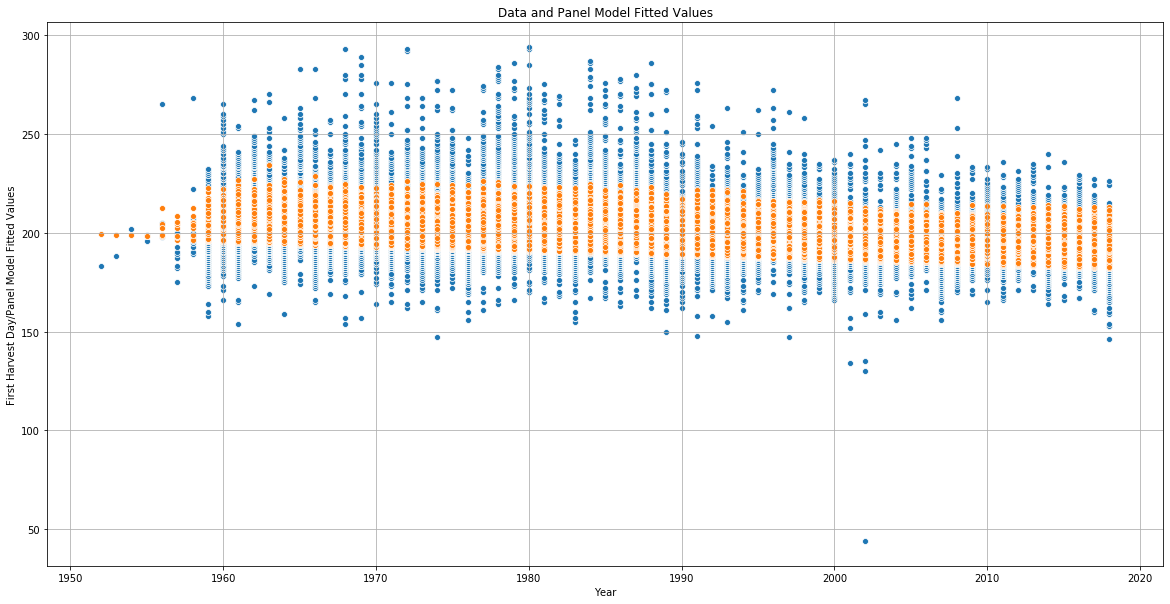

In [56]:
plt.figure(figsize=(20,10))
plt.grid()
sns.scatterplot(x=df_fin['year_dummy'], y= df_fin['day_year'])
sns.scatterplot(x=df_fin['year_dummy'], y= df_fin['fitted_values'])
plt.title("Data and Panel Model Fitted Values")
plt.xlabel('Year')
plt.ylabel('First Harvest Day/Panel Model Fitted Values');

## Test Data (Year 2019)

In [40]:
df_test

,s_id,lon,lat,alt,phase_id,year,day_year,year_dummy
147615,1184,6.16667,51.7000,30,2,2019,63,2019
147616,1266,6.81667,50.9167,80,2,2019,69,2019
147617,270,10.26670,53.7333,45,2,2019,70,2019
147618,1287,7.13333,51.0000,90,2,2019,70,2019
147619,2718,9.10000,49.2167,200,2,2019,73,2019
...,...,...,...,...,...,...,...,...
151177,5866,6.66667,51.7667,40,1,2019,311,2019
151178,3034,7.60000,47.8667,220,1,2019,312,2019
151179,2855,9.31667,49.5333,340,1,2019,313,2019
151180,2895,8.53333,49.4000,100,1,2019,316,2019


In [41]:
df_test_harvest = df_test[df_test['phase_id']==5]

In [42]:
df_test_harvest.drop(['phase_id'], axis=1, inplace=True)

/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [43]:
df_test_harvest_mi = df_test_harvest.set_index(['s_id', 'year'])

In [47]:
exog_vars = ['lon','lat','alt','year_dummy']

In [48]:
exog_test = sm.add_constant(df_test_harvest_mi[exog_vars], has_constant='add')

In [49]:
df_test_predictions_harvest = res.predict(exog_test)

/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/linearmodels/panel/data.py:98: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_categorical(s):


In [50]:
df_test_fin=df_test_harvest_mi.join(df_test_predictions_harvest).reset_index()

In [51]:
df_test_fin

,s_id,year,lon,lat,alt,day_year,year_dummy,predictions
0,2841,2019,8.65000,49.1000,140,154,2019,183.165491
1,5162,2019,12.68330,51.4333,105,166,2019,185.054593
2,4135,2019,9.98333,49.7667,240,167,2019,188.692456
3,5855,2019,8.73333,52.5000,40,169,2019,190.740054
4,5646,2019,11.41670,50.8333,420,170,2019,199.345374
...,...,...,...,...,...,...,...,...
646,3635,2019,11.91670,49.0000,500,221,2019,195.824582
647,3193,2019,9.36667,48.0833,610,223,2019,200.831445
648,4966,2019,13.43330,50.7000,650,225,2019,207.266560
649,1622,2019,7.95000,51.3500,350,227,2019,202.190118


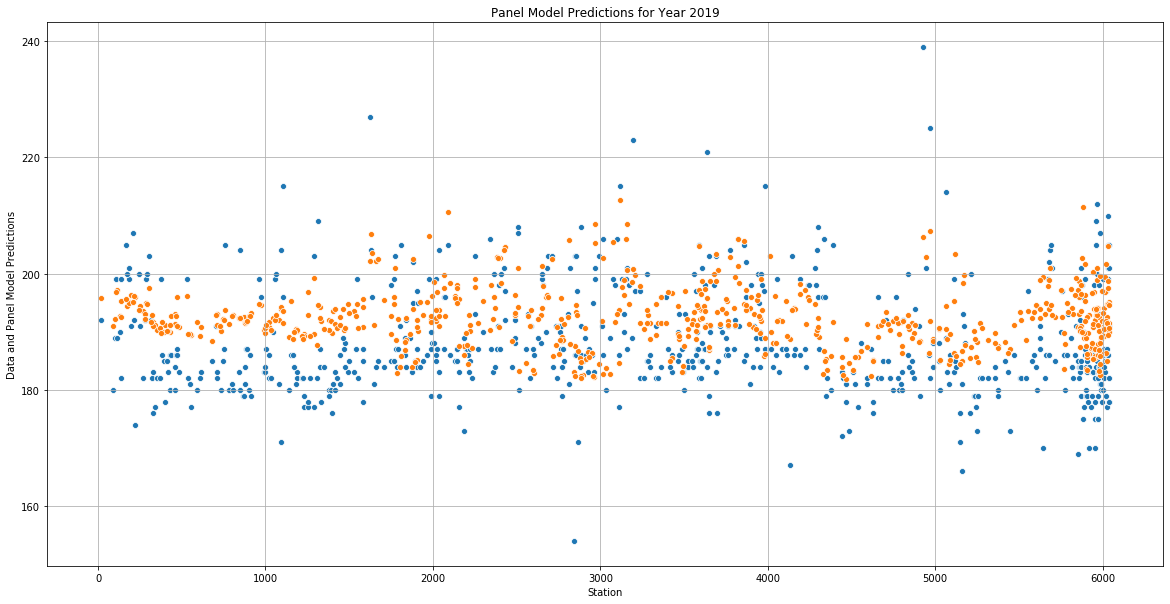

In [54]:
plt.figure(figsize=(20,10))
plt.grid()
sns.scatterplot(x=df_test_fin['s_id'], y= df_test_fin['day_year'])
sns.scatterplot(x=df_test_fin['s_id'], y= df_test_fin['predictions'])
plt.title("Panel Model Predictions for Year 2019")
plt.xlabel('Station')
plt.ylabel('Data and Panel Model Predictions');